In [1]:
#Credit Card Fradulent Transaction Classification Problem

In [2]:
#Import Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('creditcard.csv')

In [5]:
df.head()

,ID,PC1,PC2,PC3,PC4,PC5,Class
0,0,-55.250726,-13.991887,28.487842,0.158826,-0.926407,0
1,1,-56.875735,-29.555189,1.990487,0.535853,0.452358,0
2,2,-59.144792,-52.266486,9.616903,0.522322,-1.009143,0
3,3,-50.205377,36.441617,14.527072,0.109211,0.593673,0
4,4,-55.707948,-18.275413,16.567411,-0.237213,1.206393,0


In [6]:
df.shape

(4700, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4700 entries, 0 to 4699
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      4700 non-null   int64  
 1   PC1     4700 non-null   float64
 2   PC2     4700 non-null   float64
 3   PC3     4700 non-null   float64
 4   PC4     4700 non-null   float64
 5   PC5     4700 non-null   float64
 6   Class   4700 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 257.2 KB


In [8]:
df.describe()

,ID,PC1,PC2,PC3,PC4,PC5,Class
count,4700.000000,4.700000e+03,4.700000e+03,4.700000e+03,4.700000e+03,4.700000e+03,4700.000000
mean,2349.500000,-2.085101e-10,4.595754e-11,-7.446812e-11,2.127657e-12,-3.617022e-12,0.038298
std,1356.917462,9.663599e+01,4.185899e+01,1.615940e+01,1.262769e+00,8.684516e-01,0.191935
min,0.000000,-5.960928e+01,-6.574863e+01,-3.225164e+01,-4.849896e+00,-1.014364e+00,0.000000
25%,1174.750000,-5.578910e+01,-3.213214e+01,-1.355747e+01,-6.413559e-01,-7.934670e-01,0.000000
50%,2349.500000,-5.182169e+01,-9.019445e+00,-3.313884e-01,-3.340084e-02,-1.588890e-01,0.000000
75%,3524.250000,4.177834e+01,2.001120e+01,1.410733e+01,6.225490e-01,5.040251e-01,0.000000
max,4699.000000,5.910932e+02,1.593715e+02,3.253210e+01,4.941063e+00,3.586798e+00,1.000000


In [9]:
#target variable distribution
# 0- non-Fradulent tranaction 1-fradulent transaction
df['Class'].value_counts()

0    4520
1     180
Name: Class, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

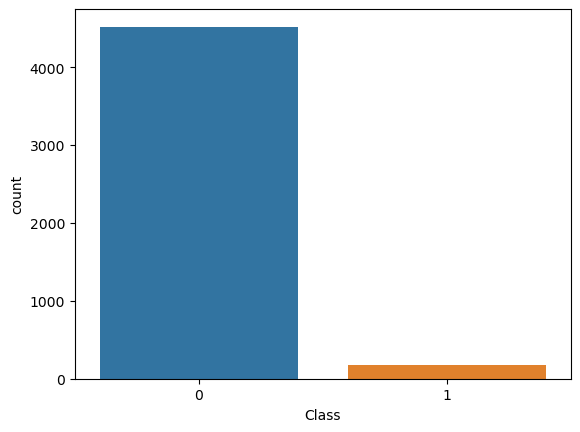

In [10]:
#visualization of target distribution

sns.countplot(x='Class',data=df)

<Axes: xlabel='PC2', ylabel='PC5'>

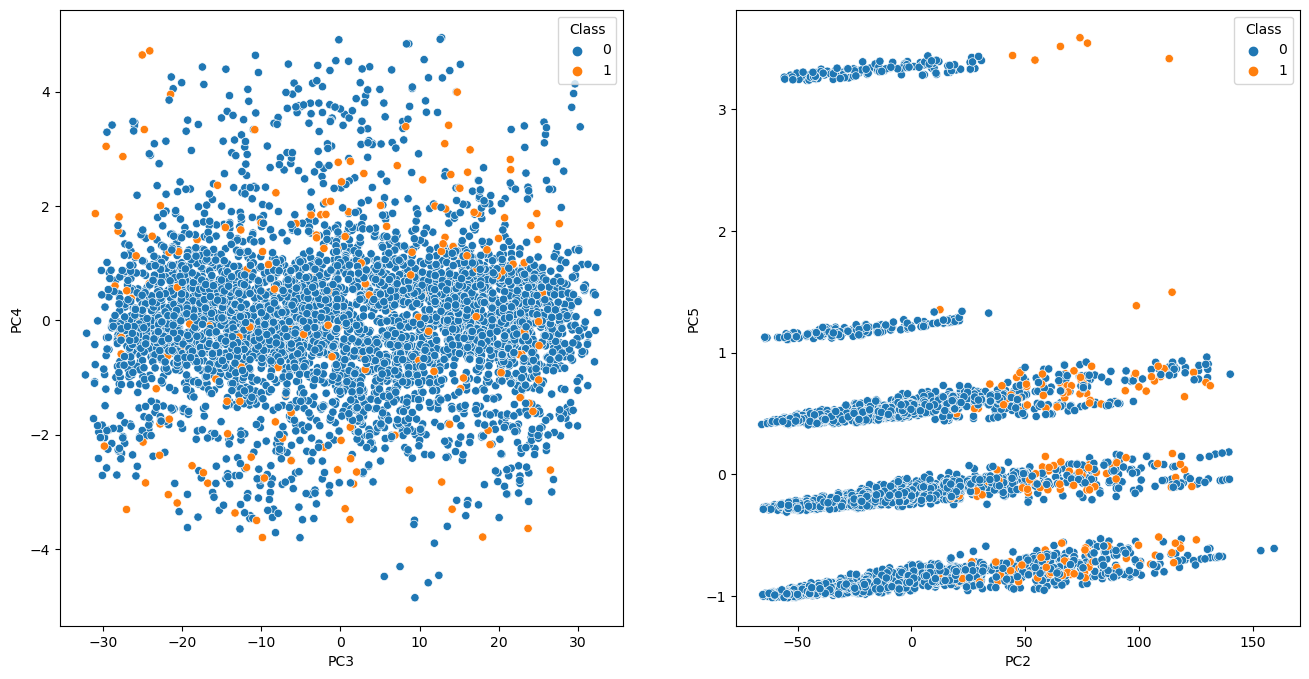

In [11]:
#plotting scatterplpot to see if any patterns are found

fig,(ax1,ax2) = plt.subplots(1,2, figsize=(16,8))
sns.scatterplot(x='PC3',y='PC4',data=df,hue='Class',ax=ax1)
sns.scatterplot(x='PC2',y='PC5',data=df,hue='Class',ax=ax2)

In [12]:
#lets start creating a baseline model

In [13]:
#drop ID column

data=df.drop(['ID'],axis=1)
data

,PC1,PC2,PC3,PC4,PC5,Class
0,-55.250726,-13.991887,28.487842,0.158826,-0.926407,0
1,-56.875735,-29.555189,1.990487,0.535853,0.452358,0
2,-59.144792,-52.266486,9.616903,0.522322,-1.009143,0
3,-50.205377,36.441617,14.527072,0.109211,0.593673,0
4,-55.707948,-18.275413,16.567411,-0.237213,1.206393,0
...,...,...,...,...,...,...
4695,-56.170382,-23.038288,24.466063,0.738193,0.450720,0
4696,25.891583,-56.480287,23.470665,-0.113639,0.435698,0
4697,-58.002084,-40.167683,-24.631097,-0.411976,-0.940187,0
4698,-55.510560,-15.355178,-27.358567,-0.784212,-0.169295,0


In [14]:
#separate target variable and features

x = data.drop(['Class'],axis=1)
y = data['Class']

In [15]:
#split the dataset into train and test

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=12)

In [16]:
#create a randomforestclassiifer

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [17]:
#predict for the test dataset

y_pred=rf.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

<Axes: >

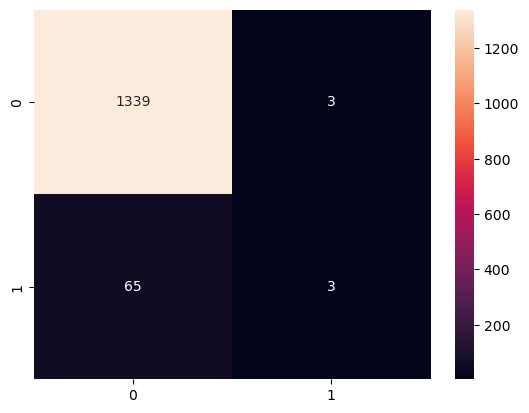

In [18]:
#plot a confusion matrix

from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='0.0f')

In [19]:
#print classification report

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1342
           1       0.50      0.04      0.08        68

    accuracy                           0.95      1410
   macro avg       0.73      0.52      0.53      1410
weighted avg       0.93      0.95      0.93      1410



In [20]:
#lets work on imbalanced data

In [21]:
#lets use SMOTE technique of sampling and balancing the data

from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
x_smote,y_smote = smote.fit_resample(x_train,y_train)

In [22]:
#create a random forest classifier on resampled data

rf_smote = RandomForestClassifier(random_state=12)
rf_smote.fit(x_smote,y_smote)

RandomForestClassifier(random_state=12)

In [23]:
y_pred_smote = rf_smote.predict(x_test)
y_pred_smote

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [24]:
result=pd.DataFrame({
    'before sampling':y_pred,
    'after sampling':y_pred_smote
})
result

,before sampling,after sampling
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
1405,0,0
1406,0,0
1407,0,0
1408,0,0


<Axes: >

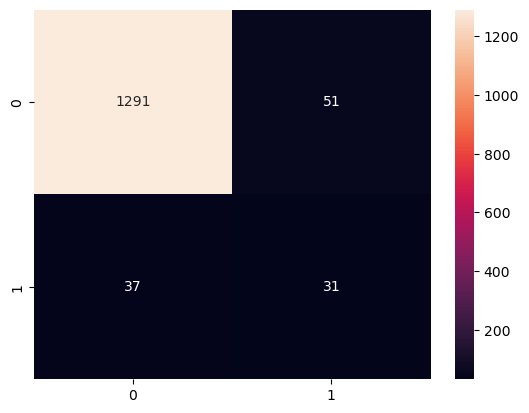

In [25]:
#plot the confusion matrix for sampled data

sns.heatmap(confusion_matrix(y_test,y_pred_smote),annot=True,fmt='0.0f')

In [26]:
#classification report of sampled data
print(classification_report(y_test,y_pred_smote))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1342
           1       0.38      0.46      0.41        68

    accuracy                           0.94      1410
   macro avg       0.68      0.71      0.69      1410
weighted avg       0.94      0.94      0.94      1410



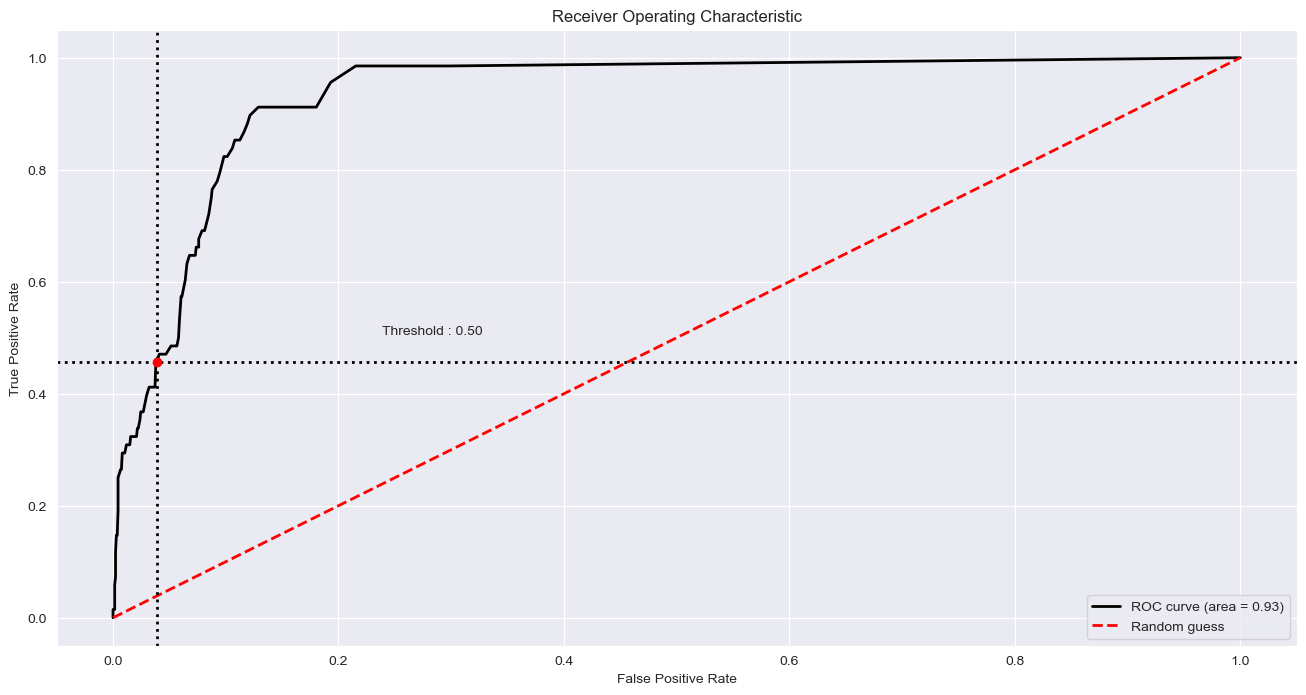

In [44]:
#plotting the ROC AND AUC Curve to increase the probability of recall

from plot_metric.functions import BinaryClassification
bc=BinaryClassification(y_test,rf_smote.predict_proba(x_test)[:,1],labels=[0,1])
plt.figure(figsize=(16,8))
bc.plot_roc_curve()
plt.show()

In [45]:
#compute the probabilities of test observation uing rf_smote

y_pred_prob = rf_smote.predict_proba(x_test)[:,1]
y_pred_prob

array([0.  , 0.  , 0.  , ..., 0.04, 0.  , 0.  ])